In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn import linear_model
import statsmodels.api as sm

In [5]:
data = pd.read_csv(r'/Users/brandonlevesque/Documents/School Work/UVM School Work/STAT 287/Final Project/Final Project Data/Instagram/stat_287_instagram_data.csv')
print(data)

         Profile  Followers Collected Date Posted Date    Likes      Type  \
0    muradosmann  3800000.0       10/19/20     10/3/20  54063.0  Portrait   
1    muradosmann  3800000.0       10/19/20     9/14/20  37954.0  Portrait   
2    muradosmann  3800000.0       10/19/20      9/9/20  50609.0  Portrait   
3    muradosmann  3800000.0       10/19/20      9/2/20  34182.0  Portrait   
4    muradosmann  3800000.0       10/19/20     8/25/20  46787.0  Portrait   
..           ...        ...            ...         ...      ...       ...   
295          NaN        NaN            NaN         NaN      NaN       NaN   
296          NaN        NaN            NaN         NaN      NaN       NaN   
297          NaN        NaN            NaN         NaN      NaN       NaN   
298          NaN        NaN            NaN         NaN      NaN       NaN   
299          NaN        NaN            NaN         NaN      NaN       NaN   

    Section one Section two Section three Section four Section five  \
0   

In [6]:
data = data[0:150]
data['Likes']= data['Likes'].astype('int')
data.head(150)
data.describe()

,Followers,Likes
count,1.500000e+02,150.000000
mean,4.280000e+06,70571.966667
std,1.322597e+06,41887.497025
min,3.000000e+06,9800.000000
25%,3.600000e+06,44618.500000
50%,3.800000e+06,60848.000000
75%,4.200000e+06,88714.750000
max,6.800000e+06,221286.000000


In [13]:
data = data.dropna()

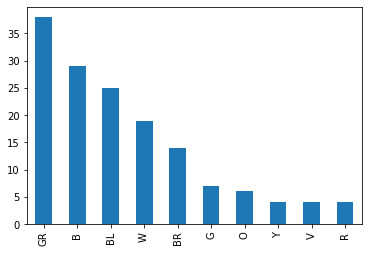

In [14]:
data['Section one'].value_counts().plot(kind='bar')

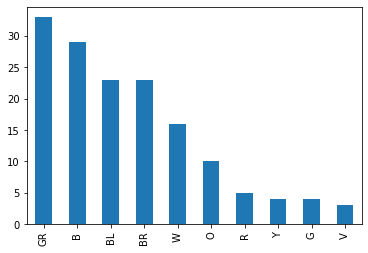

In [15]:
data['Section two'].value_counts().plot(kind='bar')

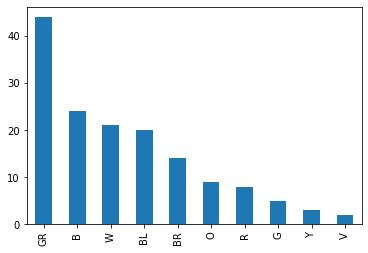

In [16]:
data['Section three'].value_counts().plot(kind='bar')

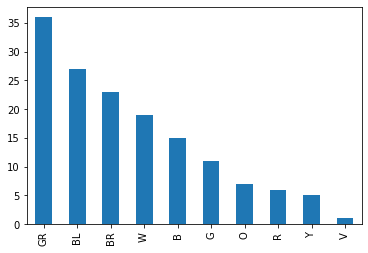

In [17]:
data['Section four'].value_counts().plot(kind='bar')

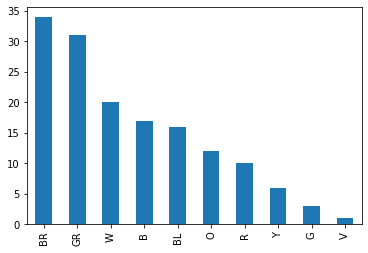

In [18]:
data['Section five'].value_counts().plot(kind='bar')

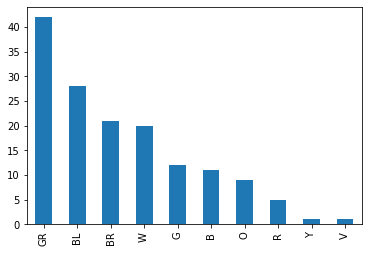

In [19]:
data['Section six'].value_counts().plot(kind='bar')

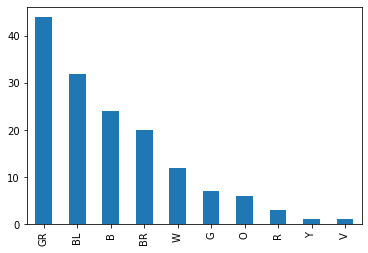

In [20]:
data['Section seven'].value_counts().plot(kind='bar')

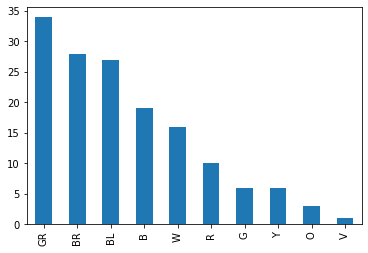

In [21]:
data['Section eight'].value_counts().plot(kind='bar')

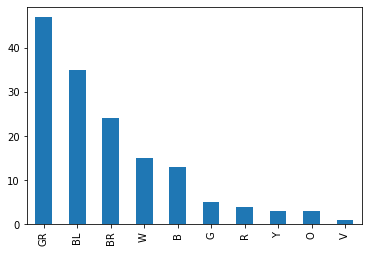

In [22]:
data['Section nine'].value_counts().plot(kind='bar')

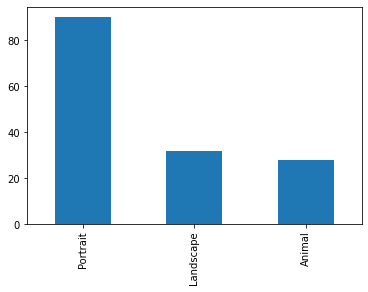

In [220]:
data['Type'].value_counts().plot(kind='bar')

In [246]:
data.groupby('Type').mean()

,Followers,Likes
Type,,
Animal,6.164286e+06,105811.357143
Landscape,3.981250e+06,58684.750000
Portrait,3.800000e+06,63835.166667


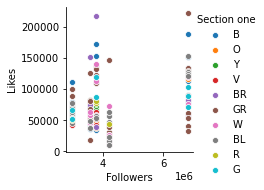

In [23]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section one')

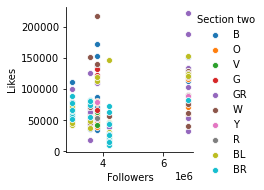

In [24]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section two')

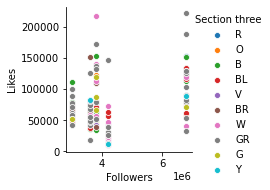

In [25]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section three')

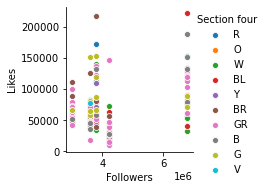

In [26]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section four')

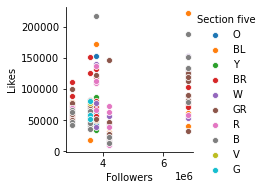

In [27]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section five')

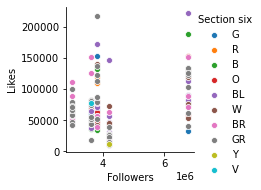

In [28]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section six')

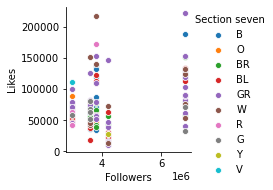

In [29]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section seven')

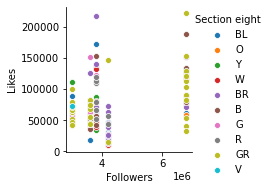

In [30]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section eight')

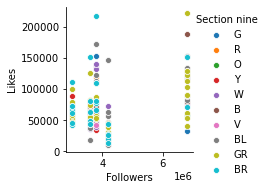

In [31]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Section nine')

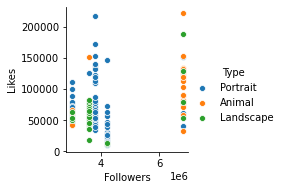

In [32]:
sns.pairplot(data, x_vars = ['Followers'], y_vars = ['Likes'], hue= 'Type')

In [33]:
new_data = data

In [34]:
new_data.head()

,Profile,Followers,Collected Date,Posted Date,Likes,Type,Section one,Section two,Section three,Section four,Section five,Section six,Section seven,Section eight,Section nine
0,muradosmann,3800000.0,10/19/20,10/3/20,54063,Portrait,B,B,R,R,O,G,B,BL,G
1,muradosmann,3800000.0,10/19/20,9/14/20,37954,Portrait,O,B,O,O,O,R,B,O,R
2,muradosmann,3800000.0,10/19/20,9/9/20,50609,Portrait,O,B,B,O,BL,G,O,BL,O
3,muradosmann,3800000.0,10/19/20,9/2/20,34182,Portrait,B,B,B,W,Y,B,B,Y,Y
4,muradosmann,3800000.0,10/19/20,8/25/20,46787,Portrait,O,O,O,BL,O,O,O,W,W


In [35]:
conversion_color_to_number = {'Section one': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9},
                             'Section two': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9},
                             'Section three': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9},
                             'Section four': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9},
                             'Section five': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9},
                             'Section six': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9},
                             'Section seven': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9},
                             'Section eight': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9},
                             'Section nine': {"B": 0, "BL": 1, 'BR': 2, "G": 3, "R": 4, 'O': 5, "Y": 6, "V": 7, 'W': 8, 'GR': 9}}

In [36]:
new_data= new_data.replace(conversion_color_to_number)
new_data.head(50)

,Profile,Followers,Collected Date,Posted Date,Likes,Type,Section one,Section two,Section three,Section four,Section five,Section six,Section seven,Section eight,Section nine
0,muradosmann,3800000.0,10/19/20,10/3/20,54063,Portrait,0,0,4,4,5,3,0,1,3
1,muradosmann,3800000.0,10/19/20,9/14/20,37954,Portrait,5,0,5,5,5,4,0,5,4
2,muradosmann,3800000.0,10/19/20,9/9/20,50609,Portrait,5,0,0,5,1,3,5,1,5
3,muradosmann,3800000.0,10/19/20,9/2/20,34182,Portrait,0,0,0,8,6,0,0,6,6
4,muradosmann,3800000.0,10/19/20,8/25/20,46787,Portrait,5,5,5,1,5,5,5,8,8
5,muradosmann,3800000.0,10/19/20,8/13/20,71584,Portrait,6,0,1,6,2,1,0,2,0
6,muradosmann,3800000.0,10/19/20,8/11/20,42240,Portrait,7,7,7,6,5,8,2,0,7
7,muradosmann,3800000.0,10/19/20,8/3/20,38459,Portrait,2,5,2,2,8,2,2,8,8
8,muradosmann,3800000.0,10/19/20,8/2/20,57415,Portrait,0,0,8,8,5,8,0,8,0
9,muradosmann,3800000.0,10/19/20,7/2/20,122366,Portrait,9,3,5,9,9,9,1,3,1


In [37]:
new_data.describe()

,Followers,Likes,Section one,Section two,Section three,Section four,Section five,Section six,Section seven,Section eight,Section nine
count,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,4.280000e+06,70571.966667,4.440000,4.140000,4.906667,4.520000,4.50000,4.813333,4.266667,4.220000,4.646667
std,1.322597e+06,41887.497025,3.695599,3.569126,3.642307,3.461621,3.33529,3.491863,3.717664,3.475456,3.663967
min,3.000000e+06,9800.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.600000e+06,44618.500000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000
50%,3.800000e+06,60848.000000,3.500000,2.500000,5.000000,3.000000,4.00000,4.000000,2.000000,3.000000,3.000000
75%,4.200000e+06,88714.750000,8.750000,8.000000,9.000000,8.000000,8.00000,9.000000,9.000000,8.000000,9.000000
max,6.800000e+06,221286.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000


In [38]:
X = new_data[['Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
Y = new_data['Likes']

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 67265.33773464023
Coefficients: 
 [ -437.2682912   1532.5846174   -401.92297198   212.11096642
 -1314.17861864  -368.23115362  1891.32555003  1503.4685011
 -1465.89154411]


In [40]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9927
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.449
Time:                        18:08:00   Log-Likelihood:                -1804.1
No. Observations:                 150   AIC:                             3628.
Df Residuals:                     140   BIC:                             3658.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.727e+04   8678.335      7.751

In [41]:
X = new_data[['Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
Y = new_data['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 67265.33773464023
Coefficients: 
 [ -437.2682912   1532.5846174   -401.92297198   212.11096642
 -1314.17861864  -368.23115362  1891.32555003  1503.4685011
 -1465.89154411]
                                 OLS Regression Results                                
Dep. Variable:                  Likes   R-squared (uncentered):                   0.652
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              29.32
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                    3.27e-28
Time:                        18:08:00   Log-Likelihood:                         -1830.9
No. Observations:                 150   AIC:                                      3680.
Df Residuals:                     141   BIC:                                      3707.
Df Model:                           9                                                  
Covariance Type:       

In [42]:
X = new_data[['Followers', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
Y = new_data['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 21828.155263163353
Coefficients: 
 [ 1.16368639e-02 -4.49415739e+02  6.12178508e+02 -2.73114981e+02
 -2.64614283e+02 -1.28515283e+03  7.91749736e+01  1.64717329e+03
  1.30852766e+03 -1.33701703e+03]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     3.188
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00103
Time:                        18:08:01   Log-Likelihood:                -1793.3
No. Observations:                 150   AIC:                             3609.
Df Residuals:                     139   BIC:                             3642.
Df Model:                          10                                         
Covariance Type:            nonrobust                                        

In [43]:
X = new_data[['Followers', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
Y = new_data['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 21828.155263163353
Coefficients: 
 [ 1.16368639e-02 -4.49415739e+02  6.12178508e+02 -2.73114981e+02
 -2.64614283e+02 -1.28515283e+03  7.91749736e+01  1.64717329e+03
  1.30852766e+03 -1.33701703e+03]
                                 OLS Regression Results                                
Dep. Variable:                  Likes   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              51.01
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                    9.28e-42
Time:                        18:08:01   Log-Likelihood:                         -1794.8
No. Observations:                 150   AIC:                                      3610.
Df Residuals:                     140   BIC:                                      3640.
Df Model:                          10                                               

In [44]:
conversion_type_to_number = {'Type': {'Portrait': '0', 'Animal': 1, 'Landscape': 2}}
new_data= new_data.replace(conversion_type_to_number)
new_data['Type']= new_data['Type'].astype('int')
new_data.head(50)

,Profile,Followers,Collected Date,Posted Date,Likes,Type,Section one,Section two,Section three,Section four,Section five,Section six,Section seven,Section eight,Section nine
0,muradosmann,3800000.0,10/19/20,10/3/20,54063,0,0,0,4,4,5,3,0,1,3
1,muradosmann,3800000.0,10/19/20,9/14/20,37954,0,5,0,5,5,5,4,0,5,4
2,muradosmann,3800000.0,10/19/20,9/9/20,50609,0,5,0,0,5,1,3,5,1,5
3,muradosmann,3800000.0,10/19/20,9/2/20,34182,0,0,0,0,8,6,0,0,6,6
4,muradosmann,3800000.0,10/19/20,8/25/20,46787,0,5,5,5,1,5,5,5,8,8
5,muradosmann,3800000.0,10/19/20,8/13/20,71584,0,6,0,1,6,2,1,0,2,0
6,muradosmann,3800000.0,10/19/20,8/11/20,42240,0,7,7,7,6,5,8,2,0,7
7,muradosmann,3800000.0,10/19/20,8/3/20,38459,0,2,5,2,2,8,2,2,8,8
8,muradosmann,3800000.0,10/19/20,8/2/20,57415,0,0,0,8,8,5,8,0,8,0
9,muradosmann,3800000.0,10/19/20,7/2/20,122366,0,9,3,5,9,9,9,1,3,1


In [247]:
X = new_data[['Type', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
Y = new_data['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 66654.60542013258
Coefficients: 
 [  899.61309436  -397.65302944  1456.79240003  -404.07247523
   241.11487048 -1330.23644348  -378.40271357  1912.62671612
  1490.89179934 -1431.51961217]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8912
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.543
Time:                        20:46:01   Log-Likelihood:                -1804.1
No. Observations:                 150   AIC:                             3630.
Df Residuals:                     139   BIC:                             3663.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
         

In [46]:
X = new_data[['Type', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
Y = new_data['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 66654.60542013258
Coefficients: 
 [  899.61309436  -397.65302944  1456.79240003  -404.07247523
   241.11487048 -1330.23644348  -378.40271357  1912.62671612
  1490.89179934 -1431.51961217]
                                 OLS Regression Results                                
Dep. Variable:                  Likes   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                              27.84
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                    1.22e-28
Time:                        18:08:04   Log-Likelihood:                         -1827.9
No. Observations:                 150   AIC:                                      3676.
Df Residuals:                     140   BIC:                                      3706.
Df Model:                          10                                                  
Covaria

In [47]:
X = new_data[['Followers', 'Type', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
Y = new_data['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 22553.684979536498
Coefficients: 
 [ 1.19737594e-02 -3.00636122e+03 -5.82155204e+02  8.38817409e+02
 -2.62202607e+02 -3.75342166e+02 -1.23064986e+03  1.26119405e+02
  1.56891987e+03  1.34491328e+03 -1.44815145e+03]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.930
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00165
Time:                        18:08:05   Log-Likelihood:                -1793.0
No. Observations:                 150   AIC:                             3610.
Df Residuals:                     138   BIC:                             3646.
Df Model:                          11                                         
Covariance Type:            nonrobust                        

In [48]:
X = new_data[['Followers', 'Type', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
Y = new_data['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 22553.684979536498
Coefficients: 
 [ 1.19737594e-02 -3.00636122e+03 -5.82155204e+02  8.38817409e+02
 -2.62202607e+02 -3.75342166e+02 -1.23064986e+03  1.26119405e+02
  1.56891987e+03  1.34491328e+03 -1.44815145e+03]
                                 OLS Regression Results                                
Dep. Variable:                  Likes   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.768
Method:                 Least Squares   F-statistic:                              46.16
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                    5.91e-41
Time:                        18:08:07   Log-Likelihood:                         -1794.7
No. Observations:                 150   AIC:                                      3611.
Df Residuals:                     139   BIC:                                      3644.
Df Model:                          11                               

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange
from sklearn.model_selection import GridSearchCV

model = Lasso(alpha = 1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean MAE: 31128.017 (6532.307)
MAE: -31128.020
Config: {'alpha': 0.99}


In [79]:
from sklearn.model_selection import train_test_split
X = new_data[['Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
y = new_data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [81]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 46504.34266666666
Mean Squared Error: 3740384274.0218782
Root Mean Squared Error: 61158.68110106592


In [82]:
X = new_data[['Followers', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
y = new_data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 37425.33756666666
Mean Squared Error: 2768399637.6360693
Root Mean Squared Error: 52615.58360064126


In [84]:
X = new_data[['Followers', 'Type', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
y = new_data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 36890.9856
Mean Squared Error: 2653297619.0583515
Root Mean Squared Error: 51510.17005464408


In [131]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = new_data[['Followers', 'Type', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine']]
y = new_data['Likes']

model = LogisticRegression(solver='liblinear', C= 10.0, random_state=0, class_weight= "balanced").fit(X, y)

In [132]:
model.classes_

array([  9800,  10170,  11969,  12239,  12553,  13341,  13692,  13912,
        14413,  16879,  17086,  17535,  18526,  19689,  22188,  22789,
        25458,  26236,  27063,  27664,  27728,  28305,  31400,  32451,
        34182,  36368,  37066,  37954,  38456,  38459,  39931,  41789,
        42216,  42240,  42305,  43281,  44522,  44535,  44869,  45468,
        45549,  45637,  46694,  46787,  47092,  47228,  48090,  48197,
        48212,  49942,  50609,  50849,  51166,  51482,  52196,  52310,
        52487,  52636,  53898,  54063,  54207,  54214,  54727,  55203,
        55338,  57015,  57166,  57415,  57944,  57952,  58350,  58369,
        58846,  59185,  60798,  60898,  61791,  62732,  62743,  62883,
        63069,  63141,  63315,  64024,  65414,  65500,  66185,  66444,
        66754,  68353,  68925,  71169,  71430,  71584,  71748,  71905,
        71974,  72888,  74293,  76229,  76834,  77925,  78100,  79067,
        79084,  79174,  81452,  81462,  81615,  81851,  82943,  86800,
      

In [133]:
model.intercept_

array([-3.84761213e-13, -3.84761213e-13, -3.84761213e-13, -3.84761213e-13,
       -3.84761213e-13, -3.84761213e-13, -3.84761216e-13, -3.84761213e-13,
       -3.84761213e-13, -3.84761213e-13, -3.84761212e-13, -3.63552504e-13,
       -3.84761212e-13, -3.84761213e-13, -3.84761213e-13, -3.84761215e-13,
       -3.84761213e-13, -3.84761213e-13, -3.84761214e-13, -3.84761211e-13,
       -3.84761213e-13, -3.84761212e-13, -3.84761214e-13, -4.39993771e-13,
       -3.71188402e-13, -3.63552504e-13, -3.63552504e-13, -3.71188402e-13,
       -3.84761213e-13, -3.71188402e-13, -4.39993793e-13, -3.24967119e-13,
       -3.63552504e-13, -3.71188402e-13, -3.24969200e-13, -3.63552504e-13,
       -3.63552504e-13, -3.84761212e-13, -3.63552504e-13, -3.24970026e-13,
       -3.84761212e-13, -3.63552504e-13, -3.84761214e-13, -3.71188402e-13,
       -3.63552504e-13, -3.24969594e-13, -3.63552504e-13, -3.63552504e-13,
       -3.63552504e-13, -3.24969106e-13, -3.71188402e-13, -3.24971446e-13,
       -3.71188402e-13, -

In [134]:
model.coef_

array([[-1.29662533e-06, -3.25215188e-13, -8.20417407e-13, ...,
        -6.06271272e-13, -9.34920337e-13, -2.55993390e-12],
       [-1.29662533e-06, -3.25215190e-13, -2.26284063e-12, ...,
        -2.25475496e-12, -2.37734356e-12, -2.55993391e-12],
       [-1.29662533e-06, -3.25215190e-13, -2.46890110e-12, ...,
        -1.43051311e-12, -2.37734356e-12, -2.55993391e-12],
       ...,
       [-1.15698442e-06, -2.96996153e-14, -2.46480330e-12, ...,
        -2.44345930e-12, -2.55483839e-12, -2.74442055e-12],
       [-1.32572961e-06, -3.25387393e-13, -2.02907109e-12, ...,
        -7.01708663e-13, -2.14815218e-12, -2.32942892e-12],
       [-1.15698442e-06, -1.76957710e-13, -1.13948105e-12, ...,
        -1.11813686e-12, -1.22951528e-12, -1.41909693e-12]])

In [135]:
model.predict_proba(X)

array([[0.00650747, 0.00650747, 0.00650747, ..., 0.01100735, 0.00583053,
        0.01100735],
       [0.00650747, 0.00650747, 0.00650747, ..., 0.01100735, 0.00583053,
        0.01100735],
       [0.00650747, 0.00650747, 0.00650747, ..., 0.01100735, 0.00583053,
        0.01100735],
       ...,
       [0.00660333, 0.00660333, 0.00660333, ..., 0.0099356 , 0.00606138,
        0.0099356 ],
       [0.00660333, 0.00660333, 0.00660333, ..., 0.0099356 , 0.00606138,
        0.0099356 ],
       [0.00660333, 0.00660333, 0.00660333, ..., 0.0099356 , 0.00606138,
        0.0099356 ]])

In [136]:
model.predict(X)

array([54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214, 54214,
       54214, 54214,

In [137]:
model.score(X, y)

0.006666666666666667

In [138]:
confusion_matrix(y, model.predict(X))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [151]:
new_data_two = data
new_data_two.head()

,Profile,Followers,Collected Date,Posted Date,Likes,Type,Section one,Section two,Section three,Section four,Section five,Section six,Section seven,Section eight,Section nine
0,muradosmann,3800000.0,10/19/20,10/3/20,54063,Portrait,B,B,R,R,O,G,B,BL,G
1,muradosmann,3800000.0,10/19/20,9/14/20,37954,Portrait,O,B,O,O,O,R,B,O,R
2,muradosmann,3800000.0,10/19/20,9/9/20,50609,Portrait,O,B,B,O,BL,G,O,BL,O
3,muradosmann,3800000.0,10/19/20,9/2/20,34182,Portrait,B,B,B,W,Y,B,B,Y,Y
4,muradosmann,3800000.0,10/19/20,8/25/20,46787,Portrait,O,O,O,BL,O,O,O,W,W


In [170]:
dum_df = pd.get_dummies(new_data_two, columns=['Type', 'Section one', 'Section two','Section three', 'Section four', 'Section five', 'Section six', 'Section seven', 'Section eight', 'Section nine'])
dum_df.head(50)

,Profile,Followers,Collected Date,Posted Date,Likes,Type_Animal,Type_Landscape,Type_Portrait,Section one_B,Section one_BL,...,Section nine_B,Section nine_BL,Section nine_BR,Section nine_G,Section nine_GR,Section nine_O,Section nine_R,Section nine_V,Section nine_W,Section nine_Y
0,muradosmann,3800000.0,10/19/20,10/3/20,54063,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,muradosmann,3800000.0,10/19/20,9/14/20,37954,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,muradosmann,3800000.0,10/19/20,9/9/20,50609,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,muradosmann,3800000.0,10/19/20,9/2/20,34182,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,muradosmann,3800000.0,10/19/20,8/25/20,46787,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,muradosmann,3800000.0,10/19/20,8/13/20,71584,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,muradosmann,3800000.0,10/19/20,8/11/20,42240,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,muradosmann,3800000.0,10/19/20,8/3/20,38459,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,muradosmann,3800000.0,10/19/20,8/2/20,57415,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
9,muradosmann,3800000.0,10/19/20,7/2/20,122366,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [248]:
X = dum_df[dum_df.columns[8:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -8.08532261537809e+17
Coefficients: 
 [-5.77306649e+03  6.44399058e+03  1.33627499e+04  4.72664435e+01
  9.78657100e+03 -2.53656233e+04  3.17716292e+04 -3.42086839e+04
  1.32601908e+03 -4.89616954e+03  4.08207558e+17  4.08207558e+17
  4.08207558e+17  4.08207558e+17  4.08207558e+17  4.08207558e+17
  4.08207558e+17  4.08207558e+17  4.08207558e+17  4.08207558e+17
  5.14265688e+17  5.14265688e+17  5.14265688e+17  5.14265688e+17
  5.14265688e+17  5.14265688e+17  5.14265688e+17  5.74867913e+17
  5.14265688e+17  5.14265688e+17 -4.69424703e+17 -4.69424703e+17
 -4.69424703e+17 -4.69424703e+17 -4.69424703e+17 -4.69424703e+17
 -4.69424703e+17 -3.34359831e+16 -4.69424703e+17 -4.69424703e+17
 -2.59955731e+16 -2.59955731e+16 -2.59955731e+16 -2.59955731e+16
 -2.59955731e+16 -2.59955731e+16 -2.59955731e+16 -2.19298497e+17
 -2.59955731e+16 -2.59955731e+16  3.41463146e+17  3.41463146e+17
  3.41463146e+17  3.41463146e+17  3.41463146e+17  3.41463146e+17
  3.41463146e+17  3.81751248e+16  3.414

In [251]:
X = dum_df[dum_df.columns[8:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -8.08532261537809e+17
Coefficients: 
 [-5.77306649e+03  6.44399058e+03  1.33627499e+04  4.72664435e+01
  9.78657100e+03 -2.53656233e+04  3.17716292e+04 -3.42086839e+04
  1.32601908e+03 -4.89616954e+03  4.08207558e+17  4.08207558e+17
  4.08207558e+17  4.08207558e+17  4.08207558e+17  4.08207558e+17
  4.08207558e+17  4.08207558e+17  4.08207558e+17  4.08207558e+17
  5.14265688e+17  5.14265688e+17  5.14265688e+17  5.14265688e+17
  5.14265688e+17  5.14265688e+17  5.14265688e+17  5.74867913e+17
  5.14265688e+17  5.14265688e+17 -4.69424703e+17 -4.69424703e+17
 -4.69424703e+17 -4.69424703e+17 -4.69424703e+17 -4.69424703e+17
 -4.69424703e+17 -3.34359831e+16 -4.69424703e+17 -4.69424703e+17
 -2.59955731e+16 -2.59955731e+16 -2.59955731e+16 -2.59955731e+16
 -2.59955731e+16 -2.59955731e+16 -2.59955731e+16 -2.19298497e+17
 -2.59955731e+16 -2.59955731e+16  3.41463146e+17  3.41463146e+17
  3.41463146e+17  3.41463146e+17  3.41463146e+17  3.41463146e+17
  3.41463146e+17  3.81751248e+16  3.414

In [250]:
X = dum_df[dum_df.columns[5:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2.5233961746784448e+17
Coefficients: 
 [-1.66413157e+15 -1.66413157e+15 -1.66413157e+15 -1.67705334e+17
 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17
 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17
 -1.67705334e+17  1.71972623e+16  1.71972623e+16  1.71972623e+16
  1.71972623e+16  1.71972623e+16  1.71972623e+16  1.71972623e+16
  1.71972623e+16  1.71972623e+16  1.71972623e+16  7.02963915e+16
  7.02963915e+16  7.02963915e+16  7.02963915e+16  7.02963915e+16
  7.02963915e+16  7.02963915e+16  1.70633056e+16  7.02963915e+16
  7.02963915e+16 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17
 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17
 -9.75480038e+16 -1.37299077e+17 -1.37299077e+17  4.75154417e+16
  4.75154417e+16  4.75154417e+16  4.75154417e+16  4.75154417e+16
  4.75154417e+16  4.75154417e+16  3.59916500e+15  4.75154417e+16
  4.75154417e+16 -5.37231086e+16 -5.37231086e+16 -5.37231086e+16
 -5.37231086e+16 -5.37231086e+16 -5.37

In [206]:
X = dum_df[dum_df.columns[5:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2.5233961746784448e+17
Coefficients: 
 [-1.66413157e+15 -1.66413157e+15 -1.66413157e+15 -1.67705334e+17
 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17
 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17
 -1.67705334e+17  1.71972623e+16  1.71972623e+16  1.71972623e+16
  1.71972623e+16  1.71972623e+16  1.71972623e+16  1.71972623e+16
  1.71972623e+16  1.71972623e+16  1.71972623e+16  7.02963915e+16
  7.02963915e+16  7.02963915e+16  7.02963915e+16  7.02963915e+16
  7.02963915e+16  7.02963915e+16  1.70633056e+16  7.02963915e+16
  7.02963915e+16 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17
 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17
 -9.75480038e+16 -1.37299077e+17 -1.37299077e+17  4.75154417e+16
  4.75154417e+16  4.75154417e+16  4.75154417e+16  4.75154417e+16
  4.75154417e+16  4.75154417e+16  3.59916500e+15  4.75154417e+16
  4.75154417e+16 -5.37231086e+16 -5.37231086e+16 -5.37231086e+16
 -5.37231086e+16 -5.37231086e+16 -5.37

In [205]:
X = dum_df[dum_df.columns[5:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2.5233961746784448e+17
Coefficients: 
 [-1.66413157e+15 -1.66413157e+15 -1.66413157e+15 -1.67705334e+17
 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17
 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17 -1.67705334e+17
 -1.67705334e+17  1.71972623e+16  1.71972623e+16  1.71972623e+16
  1.71972623e+16  1.71972623e+16  1.71972623e+16  1.71972623e+16
  1.71972623e+16  1.71972623e+16  1.71972623e+16  7.02963915e+16
  7.02963915e+16  7.02963915e+16  7.02963915e+16  7.02963915e+16
  7.02963915e+16  7.02963915e+16  1.70633056e+16  7.02963915e+16
  7.02963915e+16 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17
 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17 -1.37299077e+17
 -9.75480038e+16 -1.37299077e+17 -1.37299077e+17  4.75154417e+16
  4.75154417e+16  4.75154417e+16  4.75154417e+16  4.75154417e+16
  4.75154417e+16  4.75154417e+16  3.59916500e+15  4.75154417e+16
  4.75154417e+16 -5.37231086e+16 -5.37231086e+16 -5.37231086e+16
 -5.37231086e+16 -5.37231086e+16 -5.37

In [204]:
X = dum_df.iloc[:, np.r_[1, 5:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 41636.751481471874
Coefficients: 
 [ 7.81122310e-03  2.36700673e+04 -2.64164946e+04  2.74642726e+03
 -1.42032008e+03  5.91359629e+03  1.53043598e+04 -4.49355533e+03
  8.78987740e+03 -4.02382243e+04  3.59029918e+04 -2.71624990e+04
  3.37575077e+03  4.02802264e+03  1.25005372e+04  2.95073768e+03
 -1.08459176e+04  5.40207120e+04  1.55493641e+04  2.81946214e+04
  1.73502297e+03 -9.02969477e+04  1.56546207e+04 -2.94627506e+04
  1.24469292e+04  1.68627851e+03 -2.86322242e+04  1.57521431e+04
  6.97186164e+03 -8.64030114e+04 -1.85007338e+04  1.73648105e+04
  7.65934702e+03  7.16545995e+04  5.31444016e+03 -1.46912346e+04
 -6.36676734e+03 -1.66534202e+04 -1.06849223e+04 -2.56559715e+04
 -1.70407096e+03  4.33171141e+04 -1.48152876e+04  4.19401202e+04
 -3.17149595e+02 -2.16343849e+04 -2.30629732e+04 -6.73747824e+03
 -6.83076057e+03  4.14631047e+04 -4.15112074e+03  4.33171141e+04
 -1.26484650e+04 -9.39788652e+03 -6.80070017e+03  9.40796287e+03
  3.21458056e+04  1.26821483e+03  1.143366

In [203]:
X = dum_df.iloc[:, np.r_[1, 5:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 41636.751481471874
Coefficients: 
 [ 7.81122310e-03  2.36700673e+04 -2.64164946e+04  2.74642726e+03
 -1.42032008e+03  5.91359629e+03  1.53043598e+04 -4.49355533e+03
  8.78987740e+03 -4.02382243e+04  3.59029918e+04 -2.71624990e+04
  3.37575077e+03  4.02802264e+03  1.25005372e+04  2.95073768e+03
 -1.08459176e+04  5.40207120e+04  1.55493641e+04  2.81946214e+04
  1.73502297e+03 -9.02969477e+04  1.56546207e+04 -2.94627506e+04
  1.24469292e+04  1.68627851e+03 -2.86322242e+04  1.57521431e+04
  6.97186164e+03 -8.64030114e+04 -1.85007338e+04  1.73648105e+04
  7.65934702e+03  7.16545995e+04  5.31444016e+03 -1.46912346e+04
 -6.36676734e+03 -1.66534202e+04 -1.06849223e+04 -2.56559715e+04
 -1.70407096e+03  4.33171141e+04 -1.48152876e+04  4.19401202e+04
 -3.17149595e+02 -2.16343849e+04 -2.30629732e+04 -6.73747824e+03
 -6.83076057e+03  4.14631047e+04 -4.15112074e+03  4.33171141e+04
 -1.26484650e+04 -9.39788652e+03 -6.80070017e+03  9.40796287e+03
  3.21458056e+04  1.26821483e+03  1.143366

In [202]:
X = dum_df.iloc[:, np.r_[1, 8:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 12755.996773904459
Coefficients: 
 [ 1.43426466e-02 -1.57994287e+04  7.70139964e+03  1.47722462e+04
 -3.63290282e+03  8.44225229e+03 -4.04007535e+04  2.87279399e+04
  1.25717072e+04 -5.31355889e+03 -7.06890143e+03  2.17154591e+04
  7.13459778e+03 -7.59961535e+03  4.59443570e+04  9.83523646e+03
  3.31351907e+04  8.76697645e+03 -1.10217348e+05  1.74144204e+04
 -2.61292749e+04  1.08466818e+04 -9.02707096e+02 -2.44053967e+04
  1.17488706e+04  7.29969180e+03 -7.77418400e+04 -7.75254457e+03
  4.49945121e+03  1.35729152e+04  6.28348776e+04  1.50504863e+04
 -2.05439129e+04 -1.18805573e+04 -1.09284669e+04 -1.07509746e+04
 -3.21183779e+04 -2.39633383e+03  3.35954865e+04 -1.01864454e+04
  5.01590960e+04 -1.05457581e+04 -1.38568125e+04 -1.55164574e+04
 -9.70452813e+03 -3.95507820e+03  4.54397230e+04  3.05049888e+02
  3.35954865e+04 -1.75047382e+04 -8.25688681e+03 -2.65230677e+03
  1.06405238e+04  2.88568647e+04  5.02178386e+03  1.06567620e+04
  2.69891911e+04  2.81806609e+03  3.359548

In [200]:
X = dum_df.iloc[:, np.r_[1, 8:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 12755.996773904459
Coefficients: 
 [ 1.43426466e-02 -1.57994287e+04  7.70139964e+03  1.47722462e+04
 -3.63290282e+03  8.44225229e+03 -4.04007535e+04  2.87279399e+04
  1.25717072e+04 -5.31355889e+03 -7.06890143e+03  2.17154591e+04
  7.13459778e+03 -7.59961535e+03  4.59443570e+04  9.83523646e+03
  3.31351907e+04  8.76697645e+03 -1.10217348e+05  1.74144204e+04
 -2.61292749e+04  1.08466818e+04 -9.02707096e+02 -2.44053967e+04
  1.17488706e+04  7.29969180e+03 -7.77418400e+04 -7.75254457e+03
  4.49945121e+03  1.35729152e+04  6.28348776e+04  1.50504863e+04
 -2.05439129e+04 -1.18805573e+04 -1.09284669e+04 -1.07509746e+04
 -3.21183779e+04 -2.39633383e+03  3.35954865e+04 -1.01864454e+04
  5.01590960e+04 -1.05457581e+04 -1.38568125e+04 -1.55164574e+04
 -9.70452813e+03 -3.95507820e+03  4.54397230e+04  3.05049888e+02
  3.35954865e+04 -1.75047382e+04 -8.25688681e+03 -2.65230677e+03
  1.06405238e+04  2.88568647e+04  5.02178386e+03  1.06567620e+04
  2.69891911e+04  2.81806609e+03  3.359548

In [201]:
X = dum_df.iloc[:, np.r_[8:38]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2.587445724715067e+18
Coefficients: 
 [-2.58744572e+18 -2.58744572e+18 -2.58744572e+18 -2.58744572e+18
 -2.58744572e+18 -2.58744572e+18 -2.58744572e+18 -2.58744572e+18
 -2.58744572e+18 -2.58744572e+18 -2.56000000e+03 -1.67040000e+04
 -2.84160000e+04  2.69600000e+04 -8.76800000e+03  3.71200000e+03
 -3.98400000e+04  4.22080000e+04  1.28640000e+04  1.80800000e+04
  9.21600000e+03  1.43360000e+04 -1.60000000e+01 -1.12640000e+04
  1.22880000e+04 -1.15200000e+04  1.83680000e+04  5.60800000e+03
  2.43200000e+03 -2.54880000e+04]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.8126
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.728
Time:                        19:57:43   Log-Likelihood:          

In [207]:
X = dum_df.iloc[:, np.r_[8:38]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2.587445724715067e+18
Coefficients: 
 [-2.58744572e+18 -2.58744572e+18 -2.58744572e+18 -2.58744572e+18
 -2.58744572e+18 -2.58744572e+18 -2.58744572e+18 -2.58744572e+18
 -2.58744572e+18 -2.58744572e+18 -2.56000000e+03 -1.67040000e+04
 -2.84160000e+04  2.69600000e+04 -8.76800000e+03  3.71200000e+03
 -3.98400000e+04  4.22080000e+04  1.28640000e+04  1.80800000e+04
  9.21600000e+03  1.43360000e+04 -1.60000000e+01 -1.12640000e+04
  1.22880000e+04 -1.15200000e+04  1.83680000e+04  5.60800000e+03
  2.43200000e+03 -2.54880000e+04]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.8126
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.728
Time:                        19:59:33   Log-Likelihood:          

In [210]:
X = dum_df.iloc[:, np.r_[38:68]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 63246.186688749396
Coefficients: 
 [ 11950.7234801   -8086.76786373  -7310.3015427   28365.97604199
   2267.69352173 -10689.23278719  -5100.96374016   4951.27110375
  -6256.98767005 -10091.41054375   3206.64733626   8196.57261586
   1725.10701959 -14939.05051523   4494.0119862    2981.40290171
   7748.42095794   4951.27110375  -4281.92927356 -14082.45413253
   6995.42013329  10232.93652518   4307.28455024  -2820.07154961
   3779.55035842  10178.05334972    259.24917007   4951.27110375
  13503.29779983 -51386.99144087]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                 -0.097
Method:                 Least Squares   F-statistic:                    0.4731
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.984
Time:                        20:00:17   Log-Likelihood:             

In [211]:
X = dum_df.iloc[:, np.r_[38:68]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 63246.186688749396
Coefficients: 
 [ 11950.7234801   -8086.76786373  -7310.3015427   28365.97604199
   2267.69352173 -10689.23278719  -5100.96374016   4951.27110375
  -6256.98767005 -10091.41054375   3206.64733626   8196.57261586
   1725.10701959 -14939.05051523   4494.0119862    2981.40290171
   7748.42095794   4951.27110375  -4281.92927356 -14082.45413253
   6995.42013329  10232.93652518   4307.28455024  -2820.07154961
   3779.55035842  10178.05334972    259.24917007   4951.27110375
  13503.29779983 -51386.99144087]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                 -0.097
Method:                 Least Squares   F-statistic:                    0.4731
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.984
Time:                        20:00:55   Log-Likelihood:             

In [212]:
X = dum_df.iloc[:, np.r_[68:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 72649.99418695238
Coefficients: 
 [ 13077.41933922 -12431.78396023 -19184.47001313 -29475.30460944
    488.3924205   -5256.76805245  23876.4761674   41499.49038116
  21968.73787878 -34562.18955181  -5504.503811   -15870.63794591
  -3271.97820026  26302.51591019   8113.87534981 -17294.98681162
  12488.99501099  14874.35283876 -12600.02478543  -7237.60755553
  -6362.25612504   9114.70859929   3565.12298741   8845.89712635
   1331.48472429  10717.21701137 -18847.62151459  -5721.02036282
    542.66463335  -3186.19707961]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.8034
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.740
Time:                        20:01:31   Log-Likelihood:              

In [252]:
X = dum_df.iloc[:, np.r_[68:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 72649.99418695238
Coefficients: 
 [ 13077.41933922 -12431.78396023 -19184.47001313 -29475.30460944
    488.3924205   -5256.76805245  23876.4761674   41499.49038116
  21968.73787878 -34562.18955181  -5504.503811   -15870.63794591
  -3271.97820026  26302.51591019   8113.87534981 -17294.98681162
  12488.99501099  14874.35283876 -12600.02478543  -7237.60755553
  -6362.25612504   9114.70859929   3565.12298741   8845.89712635
   1331.48472429  10717.21701137 -18847.62151459  -5721.02036282
    542.66463335  -3186.19707961]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.8034
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.740
Time:                        22:43:19   Log-Likelihood:              

In [214]:
X = dum_df.iloc[:, np.r_[5:38]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -6.724584255450949e+17
Coefficients: 
 [1.56724682e+15 1.56724682e+15 1.56724682e+15 3.98544737e+17
 3.98544737e+17 3.98544737e+17 3.98544737e+17 3.98544737e+17
 3.98544737e+17 3.98544737e+17 3.98544737e+17 3.98544737e+17
 3.98544737e+17 1.52016707e+17 1.52016707e+17 1.52016707e+17
 1.52016707e+17 1.52016707e+17 1.52016707e+17 1.52016707e+17
 1.52016707e+17 1.52016707e+17 1.52016707e+17 1.20329735e+17
 1.20329735e+17 1.20329735e+17 1.20329735e+17 1.20329735e+17
 1.20329735e+17 1.20329735e+17 1.20329735e+17 1.20329735e+17
 1.20329735e+17]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1.803
Date:                Wed, 09 Dec 2020   Prob (F-statistic):             0.0145
Time:                        20:03:23   Log-Like

In [215]:
X = dum_df.iloc[:, np.r_[5:38]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -6.724584255450949e+17
Coefficients: 
 [1.56724682e+15 1.56724682e+15 1.56724682e+15 3.98544737e+17
 3.98544737e+17 3.98544737e+17 3.98544737e+17 3.98544737e+17
 3.98544737e+17 3.98544737e+17 3.98544737e+17 3.98544737e+17
 3.98544737e+17 1.52016707e+17 1.52016707e+17 1.52016707e+17
 1.52016707e+17 1.52016707e+17 1.52016707e+17 1.52016707e+17
 1.52016707e+17 1.52016707e+17 1.52016707e+17 1.20329735e+17
 1.20329735e+17 1.20329735e+17 1.20329735e+17 1.20329735e+17
 1.20329735e+17 1.20329735e+17 1.20329735e+17 1.20329735e+17
 1.20329735e+17]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1.803
Date:                Wed, 09 Dec 2020   Prob (F-statistic):             0.0145
Time:                        20:03:42   Log-Like

In [216]:
X = dum_df.iloc[:, np.r_[5:8, 38:68]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -2.113134065057717e+18
Coefficients: 
 [ 2.11313407e+18  2.11313407e+18  2.11313407e+18  1.05600000e+04
 -6.72000000e+03  1.79200000e+03  1.94240000e+04  1.02400000e+03
 -1.11600000e+04 -9.08000000e+03  8.54000000e+03 -8.80000000e+03
 -5.05600000e+03  5.30400000e+03  2.89700000e+03 -4.80000000e+03
 -6.99200000e+03 -2.11200000e+03  4.92800000e+03  5.82400000e+03
  8.55600000e+03 -5.64000000e+03 -8.64000000e+03  2.17600000e+03
  6.62400000e+03 -4.06000000e+02  4.28800000e+03  3.71200000e+03
  5.45600000e+03  6.20800000e+03  8.55600000e+03  9.79200000e+03
 -4.67000000e+04]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.315
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.159
Time:          

In [217]:
X = dum_df.iloc[:, np.r_[5:8, 38:68]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -2.113134065057717e+18
Coefficients: 
 [ 2.11313407e+18  2.11313407e+18  2.11313407e+18  1.05600000e+04
 -6.72000000e+03  1.79200000e+03  1.94240000e+04  1.02400000e+03
 -1.11600000e+04 -9.08000000e+03  8.54000000e+03 -8.80000000e+03
 -5.05600000e+03  5.30400000e+03  2.89700000e+03 -4.80000000e+03
 -6.99200000e+03 -2.11200000e+03  4.92800000e+03  5.82400000e+03
  8.55600000e+03 -5.64000000e+03 -8.64000000e+03  2.17600000e+03
  6.62400000e+03 -4.06000000e+02  4.28800000e+03  3.71200000e+03
  5.45600000e+03  6.20800000e+03  8.55600000e+03  9.79200000e+03
 -4.67000000e+04]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.315
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.159
Time:          

In [218]:
X = dum_df.iloc[:, np.r_[5:8, 68:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -7.767469132954012e+18
Coefficients: 
 [ 8.12496224e+18  8.12496224e+18  8.12496224e+18 -4.58529945e+17
 -4.58529945e+17 -4.58529945e+17 -4.58529945e+17 -4.58529945e+17
 -4.58529945e+17 -4.58529945e+17 -4.58529945e+17 -4.58529945e+17
 -4.58529945e+17  2.40305323e+17  2.40305323e+17  2.40305323e+17
  2.40305323e+17  2.40305323e+17  2.40305323e+17  2.40305323e+17
  2.40305323e+17  2.40305323e+17  2.40305323e+17 -1.39268489e+17
 -1.39268489e+17 -1.39268489e+17 -1.39268489e+17 -1.39268489e+17
 -1.39268489e+17 -1.39268489e+17 -1.39268489e+17 -1.39268489e+17
 -1.39268489e+17]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     1.932
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00723
Time:          

In [219]:
X = dum_df.iloc[:, np.r_[5:8, 68:98]]
Y = dum_df['Likes']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -7.767469132954012e+18
Coefficients: 
 [ 8.12496224e+18  8.12496224e+18  8.12496224e+18 -4.58529945e+17
 -4.58529945e+17 -4.58529945e+17 -4.58529945e+17 -4.58529945e+17
 -4.58529945e+17 -4.58529945e+17 -4.58529945e+17 -4.58529945e+17
 -4.58529945e+17  2.40305323e+17  2.40305323e+17  2.40305323e+17
  2.40305323e+17  2.40305323e+17  2.40305323e+17  2.40305323e+17
  2.40305323e+17  2.40305323e+17  2.40305323e+17 -1.39268489e+17
 -1.39268489e+17 -1.39268489e+17 -1.39268489e+17 -1.39268489e+17
 -1.39268489e+17 -1.39268489e+17 -1.39268489e+17 -1.39268489e+17
 -1.39268489e+17]
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     1.932
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00723
Time:          

In [174]:
X = dum_df[dum_df.columns[6:98]]
y = dum_df['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 42028.496366666666
Mean Squared Error: 3110149238.49166
Root Mean Squared Error: 55768.71200316231


In [175]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = dum_df[dum_df.columns[6:96]]
y = dum_df['Likes']

model = LogisticRegression(solver='liblinear', C= 10.0, random_state=0, class_weight= "balanced").fit(X, y)

In [176]:
model.classes_

array([  9800,  10170,  11969,  12239,  12553,  13341,  13692,  13912,
        14413,  16879,  17086,  17535,  18526,  19689,  22188,  22789,
        25458,  26236,  27063,  27664,  27728,  28305,  31400,  32451,
        34182,  36368,  37066,  37954,  38456,  38459,  39931,  41789,
        42216,  42240,  42305,  43281,  44522,  44535,  44869,  45468,
        45549,  45637,  46694,  46787,  47092,  47228,  48090,  48197,
        48212,  49942,  50609,  50849,  51166,  51482,  52196,  52310,
        52487,  52636,  53898,  54063,  54207,  54214,  54727,  55203,
        55338,  57015,  57166,  57415,  57944,  57952,  58350,  58369,
        58846,  59185,  60798,  60898,  61791,  62732,  62743,  62883,
        63069,  63141,  63315,  64024,  65414,  65500,  66185,  66444,
        66754,  68353,  68925,  71169,  71430,  71584,  71748,  71905,
        71974,  72888,  74293,  76229,  76834,  77925,  78100,  79067,
        79084,  79174,  81452,  81462,  81615,  81851,  82943,  86800,
      

In [177]:
model.intercept_

array([-2.6925784 , -2.51617406, -2.40643887, -2.62919067, -2.73893334,
       -2.68159352, -2.57209702, -2.64548558, -2.8183527 , -2.49053524,
       -2.38579447, -2.62146585, -2.64176812, -2.73888114, -2.65021083,
       -2.66116281, -2.76370089, -2.7050239 , -2.7309838 , -2.27006729,
       -2.78419611, -2.49948449, -2.75434956, -2.30450169, -2.45624033,
       -2.5109388 , -2.69876737, -2.39485343, -2.77845244, -2.48907147,
       -2.6828976 , -2.32224545, -2.42889496, -2.34232085, -2.52292366,
       -2.59844002, -2.63110881, -2.38614053, -2.50154765, -2.65165344,
       -2.81543743, -2.63518395, -2.75019145, -2.41033112, -2.78080334,
       -2.52195668, -2.66108459, -2.59128931, -2.55039704, -2.69068712,
       -2.41476069, -2.44560222, -2.780393  , -2.44037727, -2.45369092,
       -2.43983473, -2.56150699, -2.65153024, -2.51640556, -2.46591243,
       -2.49262806, -2.72073592, -2.56509428, -2.76108626, -2.82717927,
       -2.56383749, -2.73023956, -2.6843571 , -2.34929613, -2.19

In [178]:
model.coef_

array([[-0.64754824, -0.76180305, -0.41716169, ..., -0.06493468,
        -0.11336332, -0.01943295],
       [-0.62876036, -0.81615993, -0.49280671, ..., -0.31299343,
        -0.14005214, -0.03228241],
       [-0.64933078, -0.74664645,  0.46904385, ..., -0.2045498 ,
        -0.11241239, -0.03903918],
       ...,
       [-0.17406392, -1.2284724 ,  0.00792096, ..., -0.126792  ,
        -0.09125475, -0.04923036],
       [-0.76798935, -0.69105411, -0.60452534, ..., -0.16019986,
        -0.08888148, -0.03029287],
       [-1.11872854, -1.85968105, -0.66437716, ..., -0.12333768,
        -0.04501731, -0.01377254]])

In [181]:
from sklearn.model_selection import train_test_split
X = dum_df[dum_df.columns[6:96]]
y = dum_df['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [182]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 42028.496366666666
Mean Squared Error: 3110149238.49166
Root Mean Squared Error: 55768.71200316231


In [185]:
X = dum_df[dum_df.columns[6:96]]
y = dum_df['Likes']

model = Lasso(alpha = 1.0)
cv = RepeatedKFold(n_splits=20, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean MAE: 51345.438 (16875.007)
MAE: -51348.589
Config: {'alpha': 0.99}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5865285751.365341, tolerance: 26142979.864883333
  model = cd_fast.enet_coordinate_descent(
